# Iron Man Ridge Regression Implementation notebook for OPREC-24 OTI


## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exploratory Data Analysis 

### Loading the Dataset

In [2]:
DATAPATH = 'train.csv'

data = pd.read_csv(DATAPATH)
data.head()

,ID,Brand,Tipe,CPU,RAM,Memori,GPU,SistemOperasi,Berat,Layar,Harga
0,0,Pulse,NaN,Intel Core i3 7100U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.4kg,13.3inch IPS Panel Full HD 1920x1080,16258268.00
1,1,Pulse,Notebook,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Gemini 2,2.32kg,15.6inch Full HD 1920x1080,14133900.00
2,2,Zenith,2 in 1 Convertible,NaN,8GB,256GB SSD,Intel HD Graphics 520,Gemini 5,1.6kg,13.3inch IPS Panel Full HD / Touchscreen 1920x...,13517319.32
3,3,Vivid,Notebook,NaN,4GB,500GB HDD,Intel HD Graphics 400,No OS,1.86kg,15.6inch 1366x768,4437188.00
4,4,Zenith,Notebook,Intel Core i3 6006U 2GHz,NaN,500GB HDD,Nvidia GeForce GTX 940MX,Gemini 5,2.2kg,15.6inch 1366x768,8034908.00


### Dropping the ID

In [3]:
data.drop(['ID'], axis=1, inplace=True)

### Analyzing the Dataset

In [4]:
data

,Brand,Tipe,CPU,RAM,Memori,GPU,SistemOperasi,Berat,Layar,Harga
0,Pulse,NaN,Intel Core i3 7100U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.4kg,13.3inch IPS Panel Full HD 1920x1080,16258268.00
1,Pulse,Notebook,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Gemini 2,2.32kg,15.6inch Full HD 1920x1080,14133900.00
2,Zenith,2 in 1 Convertible,NaN,8GB,256GB SSD,Intel HD Graphics 520,Gemini 5,1.6kg,13.3inch IPS Panel Full HD / Touchscreen 1920x...,13517319.32
3,Vivid,Notebook,NaN,4GB,500GB HDD,Intel HD Graphics 400,No OS,1.86kg,15.6inch 1366x768,4437188.00
4,Zenith,Notebook,Intel Core i3 6006U 2GHz,NaN,500GB HDD,Nvidia GeForce GTX 940MX,Gemini 5,2.2kg,15.6inch 1366x768,8034908.00
...,...,...,...,...,...,...,...,...,...,...
1037,Pulse,Notebook,Intel Core i7 7820HQ 2.9GHz,8GB,256GB SSD,Nvidia Quadro M2200M,Gemini 5,2.67kg,15.6inch Full HD 1920x1080,35805880.00
1038,Stellar,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 500,Gemini 5,2kg,15.6inch 1366x768,5208128.00
1039,Vivid,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.28kg,13.3inch Full HD / Touchscreen 1920x1080,39009564.00
1040,Stellar,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Gemini 5,1.63kg,14.0inch 1366x768,5122468.00


In [5]:
data.columns

Index(['Brand', 'Tipe', 'CPU', 'RAM', 'Memori', 'GPU', 'SistemOperasi',
       'Berat', 'Layar', 'Harga'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          1042 non-null   object 
 1   Tipe           979 non-null    object 
 2   CPU            948 non-null    object 
 3   RAM            1011 non-null   object 
 4   Memori         1042 non-null   object 
 5   GPU            979 non-null    object 
 6   SistemOperasi  1011 non-null   object 
 7   Berat          1042 non-null   object 
 8   Layar          1042 non-null   object 
 9   Harga          1042 non-null   float64
dtypes: float64(1), object(9)
memory usage: 81.5+ KB


In [7]:
data.describe()

,Harga
count,1.042000e+03
mean,1.919699e+07
std,1.186602e+07
min,2.980968e+06
25%,1.026207e+07
50%,1.666944e+07
75%,2.545520e+07
max,1.044881e+08


### Extracting the continuous data in the column 'Berat'

In [8]:
data['Berat'] = data['Berat'].str.extract('(\d+\.?\d*)').astype(float) # Extract numbers including decimals

### Visualizing the distribution of the weight and the price of dataset

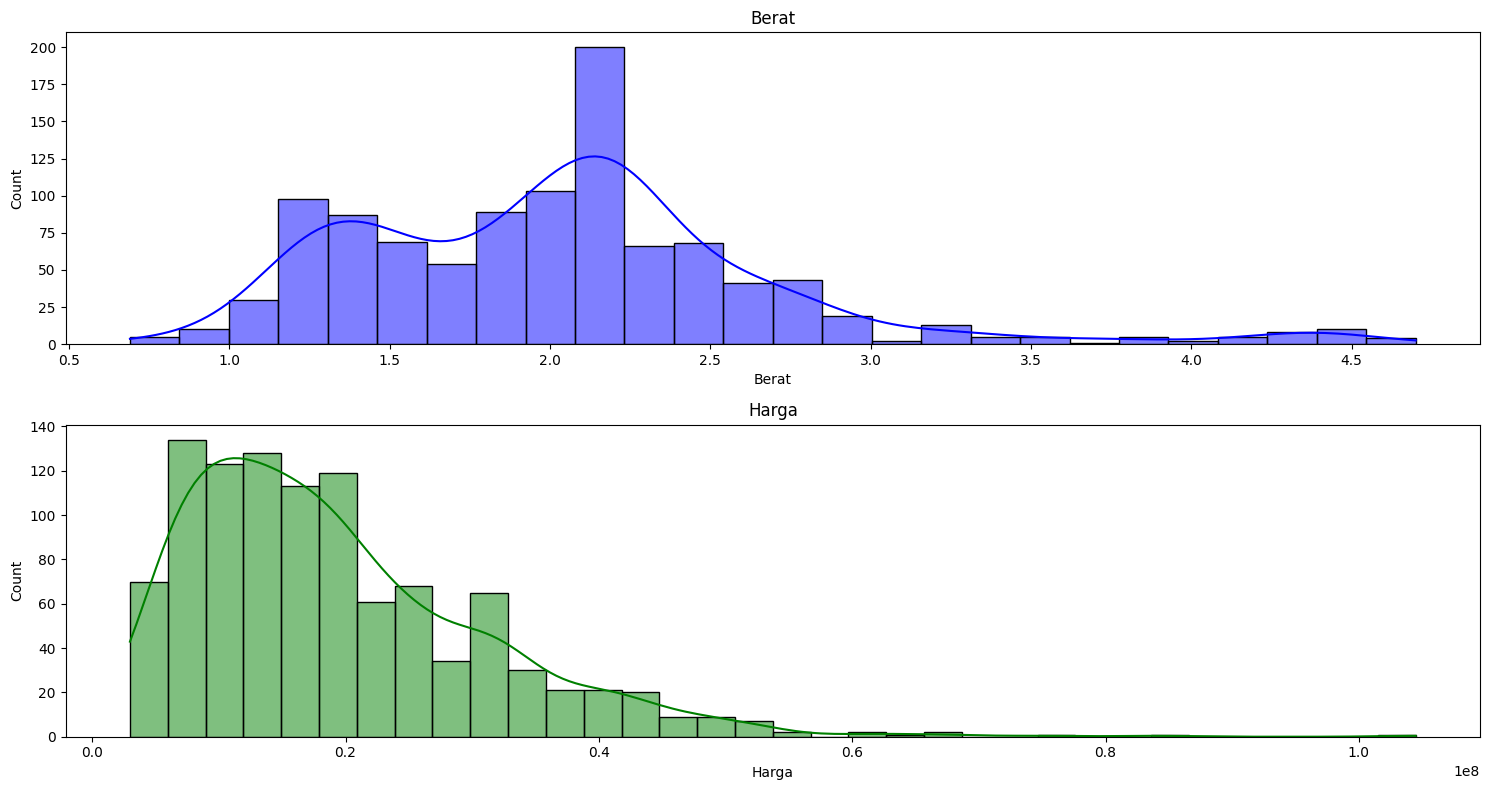

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))  # Create a 3x3 grid of subplots

# Plot histograms using Seaborn on each subplot
sns.histplot(data['Berat'], kde=True, ax=axes[0], color='blue')
sns.histplot(data['Harga'], kde=True, ax=axes[1], color='green')

# Customize subplot titles
axes[0].set_title('Berat')
axes[1].set_title('Harga')


plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


## Preprocessing

### Encoding all categorical feature

In [10]:
categorical_columns = ['Brand', 'Tipe', 'CPU', 'RAM', 'Memori', 'GPU', 'SistemOperasi', 'Layar']
for column in categorical_columns:
    data[column] = data[column].fillna('Unknown')

### Encoding the rest of the data as discrete data

In [11]:
df = pd.DataFrame(data)

# Applying one-hot encoding
data = pd.get_dummies(df, columns=['Brand', 'Tipe', 'CPU', 'RAM', 'Memori', 'GPU', 'SistemOperasi', 'Layar'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Columns: 378 entries, Berat to Layar_18.4inch Full HD 1920x1080
dtypes: bool(376), float64(2)
memory usage: 399.0 KB


## Modelling 

### Ridge regression 

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Xs = data.drop(['Harga'], axis=1)
y = data['Harga'].values.reshape(-2,1)

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

### Parameter Optimalization result

In [14]:
ridge_regressor.best_params_

{'alpha': 1}

In [15]:
ridge_regressor.best_score_

-29420785547191.3

### RMSE score

In [16]:
neg_mse_scores1 = cross_val_score(ridge_regressor, Xs, y, scoring='neg_mean_squared_error', cv=5)
mse_scores = -neg_mse_scores1
rmse_scores = np.sqrt(mse_scores)

print(rmse_scores)

[4917004.03922913 6195201.71192497 5281656.89544772 4781065.22626661
 5813087.86306182]


# Predicting The Test set


## processing the test data

In [17]:
DATAPATH_test = 'test.csv'

data_test = pd.read_csv(DATAPATH_test)
data_test.head()

,ID,Brand,Tipe,CPU,RAM,Memori,GPU,SistemOperasi,Berat,Layar
0,0,Pulse,Gaming,Intel Core i7 6820HK 2.7GHz,32GB,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Gemini 5,4.6kg,17.3inch IPS Panel Full HD 1920x1080
1,1,Vivid,Notebook,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,15.6inch 1366x768
2,2,Eclipse,Notebook,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Gemini 5,2.2kg,15.6inch 1366x768
3,3,Orbit,Ultrabook,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 620,Gemini 5 S,1.252kg,13.5inch Touchscreen 2256x1504
4,4,Pulse,Ultrabook,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.36kg,12.5inch IPS Panel Full HD 1920x1080


### Processing the test data

In [18]:
test_ids = data_test['ID'].copy()
data_test.drop(['ID'], axis=1, inplace=True)

data_test['Berat'] = data_test['Berat'].str.extract('(\d+\.?\d*)').astype(float) # Extract numbers including decimals

df_test = pd.DataFrame(data_test)

### Applying one-hot encoding

In [19]:
data_test = pd.get_dummies(df_test, columns=['Brand', 'Tipe', 'CPU', 'RAM', 'Memori', 'GPU', 'SistemOperasi', 'Layar'])

### Checking the correctness of data_test preprocessing

In [20]:
data_test.columns

Index(['Berat', 'Brand_Cosmo', 'Brand_Eclipse', 'Brand_Epic', 'Brand_Galaxy',
       'Brand_Lumina', 'Brand_Orbit', 'Brand_Pulse', 'Brand_Puzzle',
       'Brand_Quantum',
       ...
       'Layar_15.6inch IPS Panel Full HD / Touchscreen 1920x1080',
       'Layar_15.6inch IPS Panel Full HD 1920x1080',
       'Layar_15.6inch Touchscreen 1366x768', 'Layar_17.3inch 1366x768',
       'Layar_17.3inch 1600x900',
       'Layar_17.3inch 4K Ultra HD / Touchscreen 3840x2160',
       'Layar_17.3inch Full HD / Touchscreen 1920x1080',
       'Layar_17.3inch Full HD 1920x1080',
       'Layar_17.3inch IPS Panel 4K Ultra HD 3840x2160',
       'Layar_17.3inch IPS Panel Full HD 1920x1080'],
      dtype='object', length=207)

In [21]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 207 entries, Berat to Layar_17.3inch IPS Panel Full HD 1920x1080
dtypes: bool(206), float64(1)
memory usage: 54.7 KB


### Align test dataset columns with training dataset

In [22]:
Xs_test_aligned = data_test.reindex(columns=Xs.columns, fill_value=0)

## Predicting The Test Data

In [23]:
y_pred = ridge_regressor.predict(Xs_test_aligned)

In [24]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(y_pred, columns=['Harga'])

# Add the ID column
predictions_df['ID'] = test_ids.values

# Ensure the ID column is the first column
predictions_df = predictions_df[['ID', 'Harga']]


In [25]:
predictions_df.head()

,ID,Harga
0,0,4.068313e+07
1,1,4.508831e+06
2,2,6.759438e+06
3,3,2.075696e+07
4,4,2.614930e+07


In [26]:
# Export the DataFrame to a CSV file
predictions_df.to_csv('predictions_final.csv', index=False)